### PCA---Principal Component Analysis

#### Task 1: Exploratory Data Analysis (EDA):

### 1. Load the dataset and perform basic data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

## Load the dataset:

In [2]:
df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Basic data exploration

In [3]:
df.shape

(178, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
## Statistical 
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 2. Examine the distribution of features using histograms, box plots, or density plots.

### Histograms:

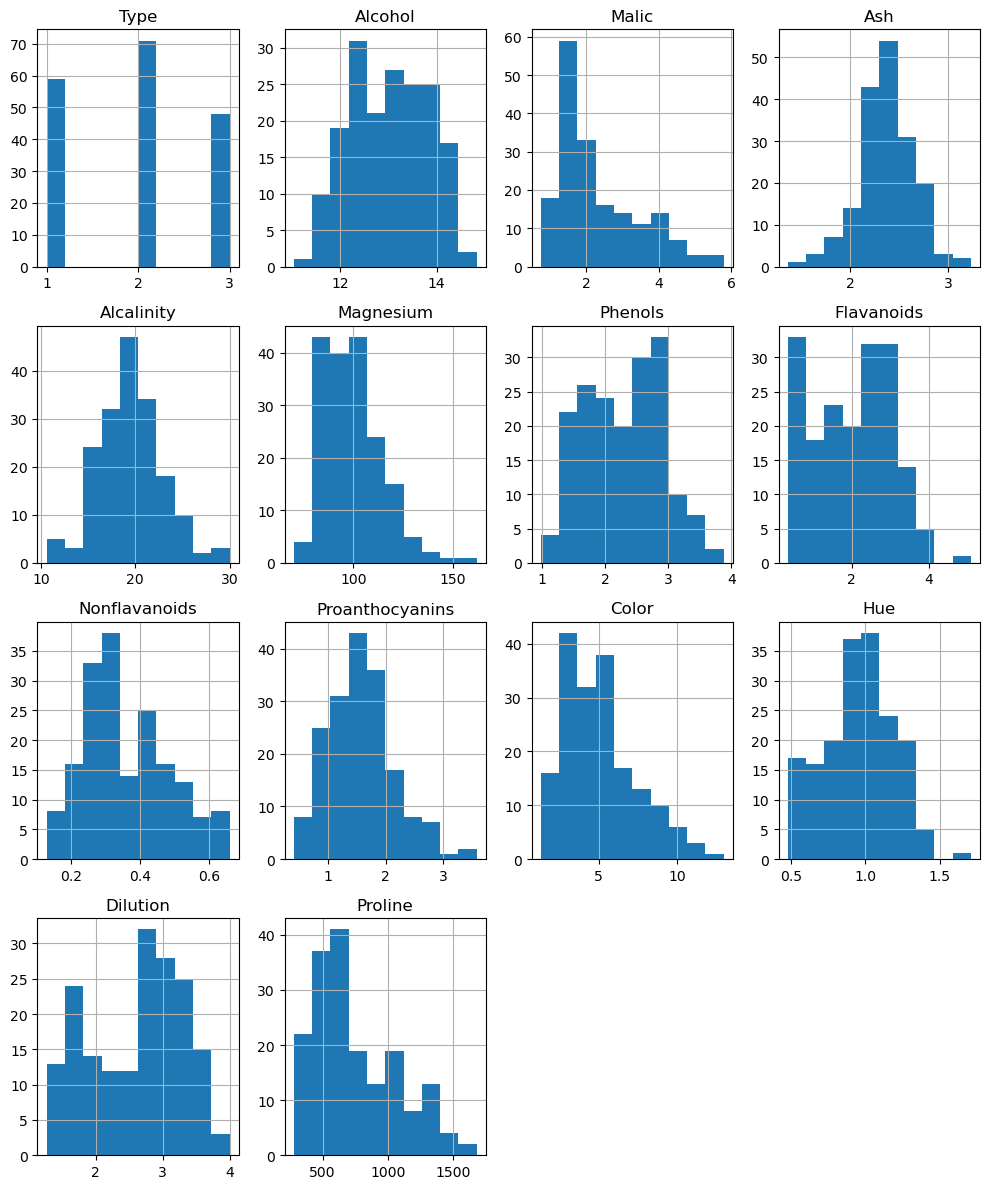

In [6]:
# plots histograms for each numeric column
df.hist(figsize=(10,12))
# Adjusts spacing to prevent overlap
plt.tight_layout()
# Display the plots
plt.show()

### Box plot:

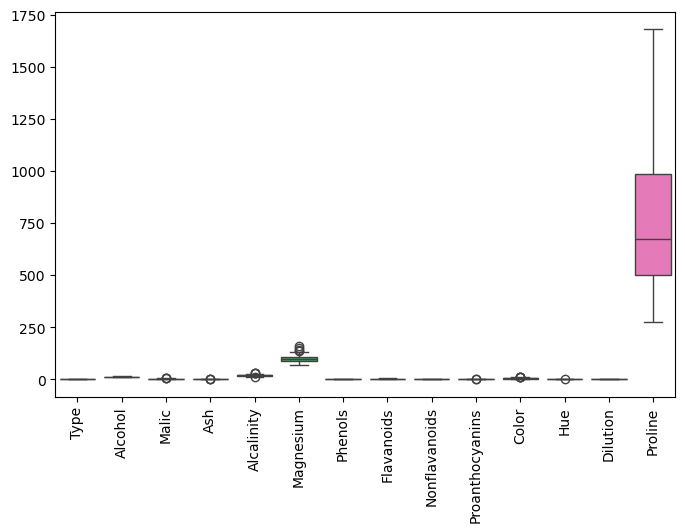

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show();

## Density plot:

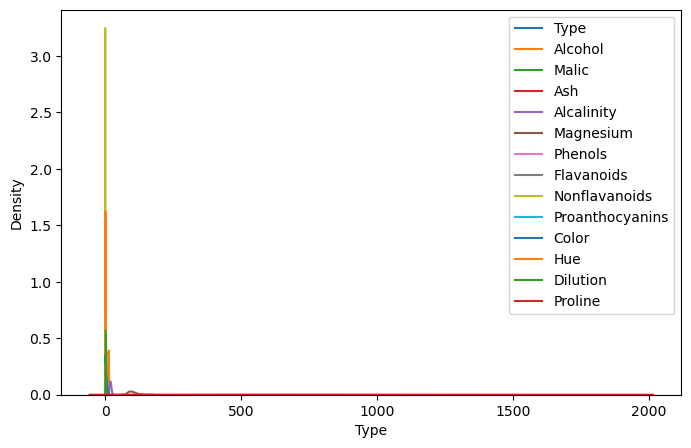

In [8]:
plt.figure(figsize=(8,5))
for column in df.columns:
    sns.kdeplot(df[column], label=column)
plt.legend()
plt.show();

### 3. Investigate correlations between features to understand relationships within the data

### Correlation matix

In [9]:
correlation_matrix = df.corr()
correlation_matrix

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


## Heatmap

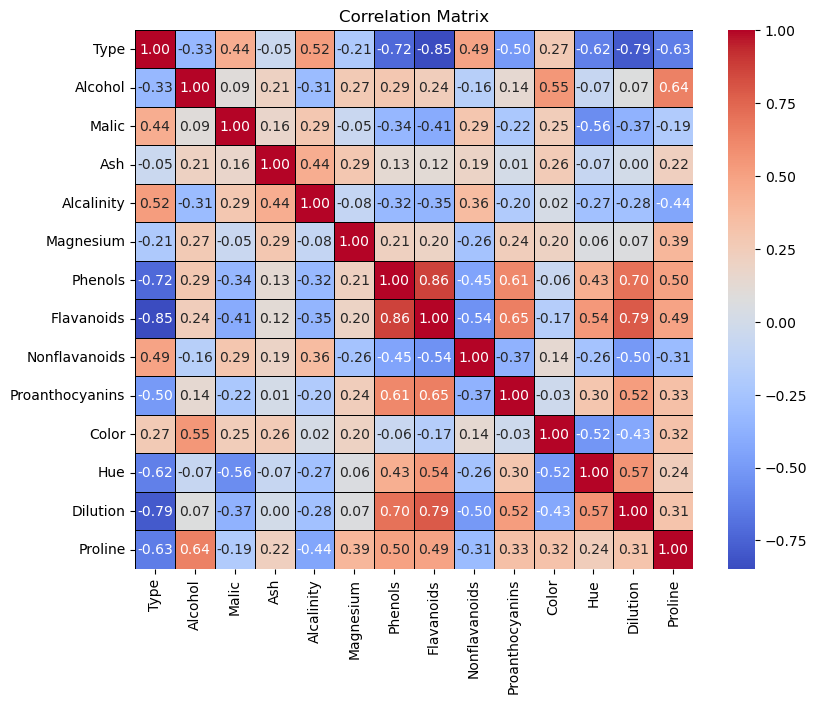

In [10]:
plt.figure(figsize=(9,7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',linewidths=0.5,linecolor='black')
plt.title('Correlation Matrix')
plt.show();

## Task 2: Dimensionality Reduction with PCA:

#### 1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset

### Standardizing the features:

In [11]:
std = StandardScaler()
df1 = pd.DataFrame(std.fit_transform(df),columns=df.columns)
df1.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### PCA---Principal Component Analysis

### Implement PCA to reduce the dimensionality of the dataset:

In [12]:
pca=PCA(n_components=10)
pca.fit(df1)

PCA(n_components=10)

## 3. Determine the optimal number of principal components using techniques like screen plot or cumulative explained variance

In [13]:
pca.explained_variance_ratio_ ### PCA1 PCA2.......PCA10

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615])

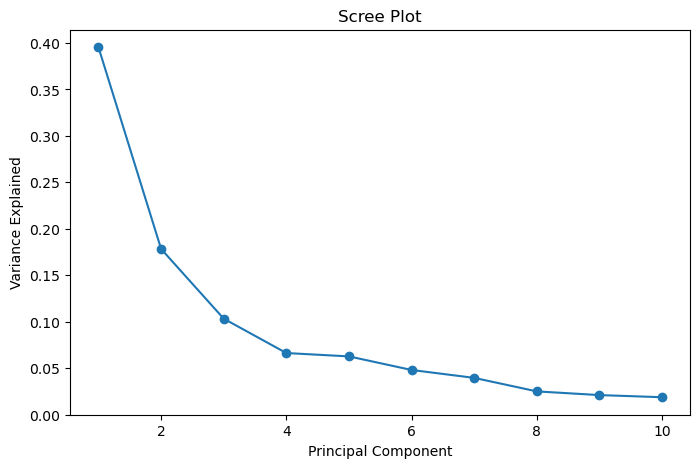

In [14]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

### cumulative explained variance

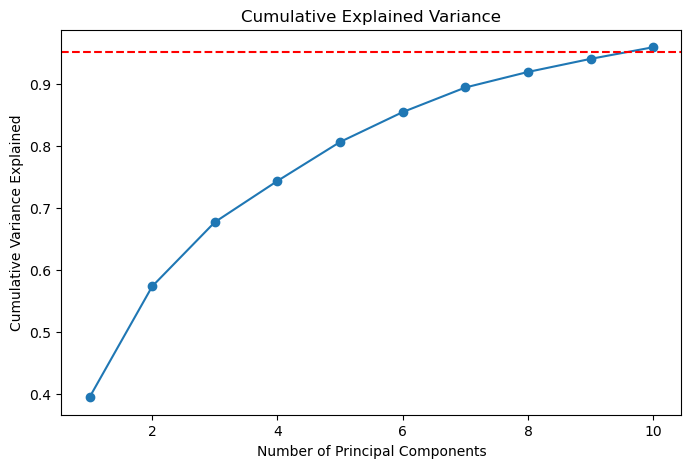

In [15]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.95, color='red', linestyle='--')
plt.show();

### 4. Transform the original dataset into the principal components.

In [16]:
print(pca.feature_names_in_)

['Type' 'Alcohol' 'Malic' 'Ash' 'Alcalinity' 'Magnesium' 'Phenols'
 'Flavanoids' 'Nonflavanoids' 'Proanthocyanins' 'Color' 'Hue' 'Dilution'
 'Proline']


In [17]:
pca_components = pca.transform(df[pca.feature_names_in_])
pca_components

array([[-304.45767569,  438.23342546, -108.78717118, ...,  111.23410089,
         538.63274508,   28.1098635 ],
       [-297.3656085 ,  423.46662038, -113.21259784, ...,  111.23995818,
         538.1462785 ,   31.85930514],
       [-332.53702582,  474.18218352, -125.15180911, ...,  129.47111394,
         610.95319473,   37.38851222],
       ...,
       [-236.09680144,  354.76465405,  -79.25704628, ...,   88.70651981,
         414.98233564,   20.39462229],
       [-237.9331484 ,  355.72533129,  -79.77580416, ...,   89.08679502,
         417.84134861,   19.88314031],
       [-158.4048221 ,  246.85314434,  -44.45598039, ...,   63.58660911,
         270.25395413,    9.67420558]])

## Task 3: Clustering with Original Data:

## 1. Apply a clustering algorithm (e.g., K-means) to the original dataset.

In [18]:
## Applying K-Means
kmeans = KMeans(n_clusters=3,random_state=42)
df['cluster'] = kmeans.fit_predict(df)

In [19]:
np.unique(df['cluster'])

array([0, 1, 2])

In [20]:
kmeans.inertia_

2633614.4632616797

In [21]:
silhouette_score(df,df['cluster'])

0.5595759408365634

## 2. Visualize the clustering results using appropriate plots.

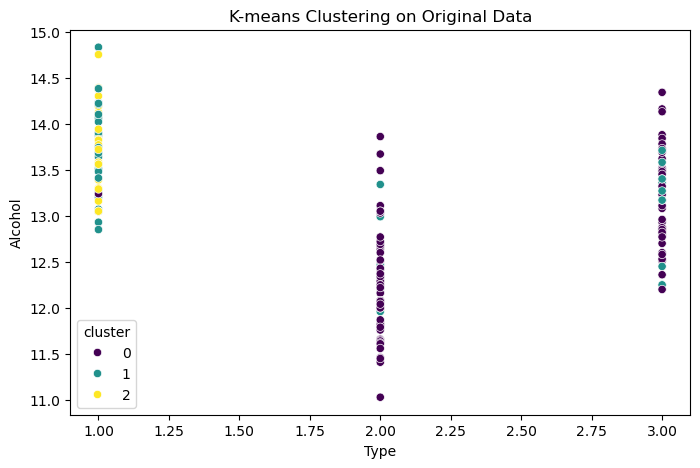

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1],hue=df['cluster'],data=df, palette='viridis')
plt.title('K-means Clustering on Original Data')
plt.show();

## 3. Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [23]:
silhouette = silhouette_score(df1,df['cluster'])
davies_bouldin = davies_bouldin_score(df1,df['cluster'])

In [24]:
print(f'Silhouette Score: {silhouette}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.07917170354486144
Davies-Bouldin Index: 2.4311495887295287


### Task 4: Clustering with PCA Data:

#### 1. Apply the same clustering algorithm to the PCA-transformed dataset.

#### Apply K-Means to PCA components

In [25]:
kmeans_pca = KMeans(n_clusters=3)
clusters_pca = kmeans_pca.fit_predict(pca_components)

In [26]:
np.unique(clusters_pca )

array([0, 1, 2])

In [27]:
kmeans.inertia_

2633614.4632616797

In [28]:
silhouette_score(df,clusters_pca)

0.5711192650607084

### 2. Visualize the clustering results obtained from PCA-transformed data.

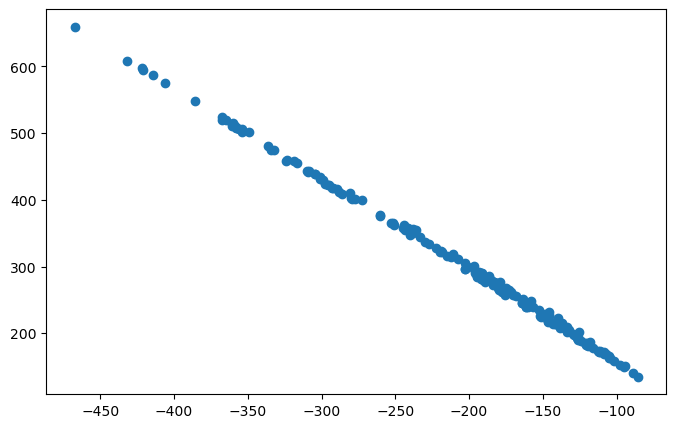

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])

## Task 5: Comparison and Analysis:

### 1. Clustering Results: Original vs. PCA-Transformed Data

#### Original Dataset Clustering:

#### PCA-Transformed Data Clustering:

### 2. similarities or differences observed in the clustering results.

Similarity: Both methods can detect natural groupings (e.g.,the 3 wine classes)

Difference: PCA simplifies the feature space, often making clustering more efficient and interpretable

### 3.Impact of dimensionality reduction on clustering performance

### 4. Trade-offs between using PCA and clustering directly on the original dataset

### Task 6: Conclusion and Insights

#### 1. Summarize the key findings and insights from the assignment

#### 2. The practical implications of using PCA and clustering in data analysis

#### 3. Provide recommendations for when to use each technique based on the analysis conducted.